In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

In [289]:
!pip install wn
!python -m wn download omw-he:1.4


Cached file found: C:\Users\rugio\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\rugio\AppData\Local\Temp\tmpwv_5m7rn\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [190]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [191]:
df_train.head(8)
df_train.shape
df_test.head()

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...


In [192]:
df_test.head(3)

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


### Implementation:

Text(0.5, 1.0, 'Participants Split By Gender')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

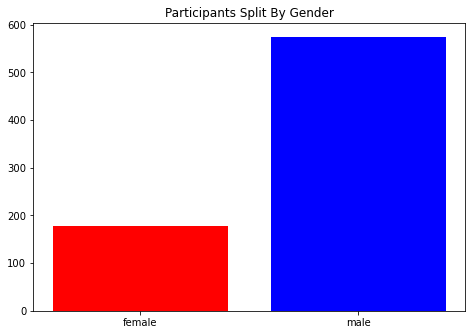

In [193]:
# Comparing and ploting the number of males and females

n = len(df_train["gender"])
gender_stat = df_train["gender"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Participants Split By Gender')
langs = ['female', 'male']
gen = [gender_stat["f"],gender_stat["m"]]
ax.bar(langs[0],gen[0],color = 'r')
ax.bar(langs[1],gen[1],color = 'b')
plt.show()

Text(0.5, 1.0, 'Avrage Story Length By Gender')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

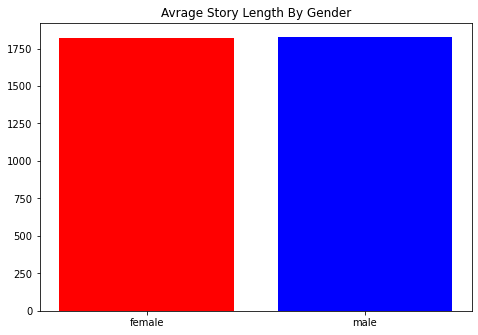

In [194]:
# Comparing and ploting the avrage story len of males and females

len_male = []
len_female = []
word_count_male = []
word_count_female = []

for i in range(n):
    if df_train["gender"][i] == "m":
        len_male.append(len(df_train["story"][i]))
        temp = df_train["story"][i].split()
        word_count_male.append(len(temp))
    else:
        len_female.append(len(df_train["story"][i]))
        temp = df_train["story"][i].split()
        word_count_female.append(len(temp))

len_male_avg = sum(len_male)/gender_stat["m"]
len_female_avg = sum(len_female)/gender_stat["f"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Avrage Story Length By Gender')
langs = ['female', 'male']
gen = [gender_stat["f"],gender_stat["m"]]
ax.bar(langs[0],len_female_avg,color = 'r')
ax.bar(langs[1],len_male_avg,color = 'b')
plt.show()

Text(0.5, 1.0, 'Avrage Word Count By Gender')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

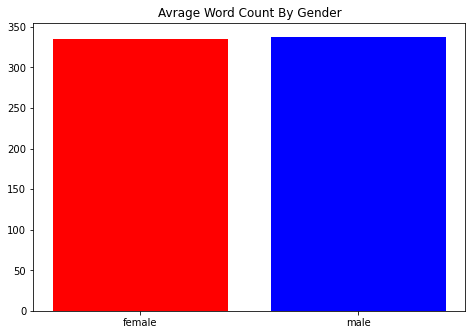

In [195]:
len_male_avg1 = sum(word_count_male)//gender_stat["m"]
len_female_avg1 = sum(word_count_female)//gender_stat["f"]
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.set_title('Avrage Word Count By Gender')
ax1.bar(langs[0],len_female_avg1,color = 'r')
ax1.bar(langs[1],len_male_avg1,color = 'b')

plt.show()

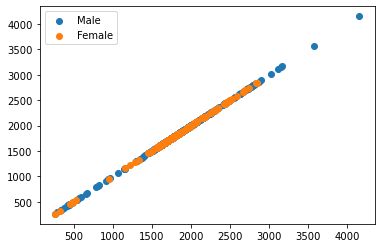

In [196]:
# Comparing and ploting the length of story

df = {
    'len_male': np.array(len_male),
    'len_female': np.array(len_female)
}
plt.scatter(df['len_male'], df['len_male'], label= "Male")
plt.scatter(df['len_female'], df['len_female'], label= "Female")
plt.legend(["Male", "Female"])
plt.show()

In [197]:
def count_words_story_len(docs):
    word_count = []
    story_len = []
    for i in range(n):
        story_len.append(len(docs[i]))
        temp = docs[i].split()
        word_count.append(len(temp))
    return word_count, story_len

In [198]:
def clean_smaple(s):
    s = re.sub(r'[^\w]|[\d]', ' ', s)
    s = re.sub(r"\s\w\s","",s)
    while "  " in s:
        s = s.replace("  "," ")
    return s

In [199]:
def clean_doc(docs_org):
    docs = docs_org.copy()
    for i in range(len(docs_org)):
        docs[i] = clean_smaple(docs[i])
    return docs

In [200]:
gender = df_train["gender"]
word_counter, story_len = count_words_story_len(df_train["story"])
story = clean_doc(df_train["story"])

In [201]:
vec = TfidfVectorizer(
        lowercase=True,
        max_features = 200,
        max_df= 0.7,
        min_df = 3,
        ngram_range=(1,3))
vectors = vec.fit_transform(story)
feature_names = vec.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
scaler = StandardScaler()
denselist = scaler.fit_transform(denselist)
df_tf = pd.DataFrame(denselist, columns=feature_names)

In [202]:
pca = PCA(n_components=80)
df_tf_pca = pd.DataFrame(pca.fit_transform(df_tf))

In [203]:
le = preprocessing.LabelEncoder()
gender_le = le.fit_transform(gender)

In [204]:
le.inverse_transform([0,1])

array(['f', 'm'], dtype=object)

In [205]:
df_tf_pca["gender"] = gender_le

In [206]:
temp = []
for i,row in zip( range(n), df_tf_pca.itertuples(index=False)):
    if row[-1] == 0 and 250 <= word_counter[i] <= 350:
        temp.append(list(row))
        temp.append(list(row))
    else:
        temp.append(list(row))
df_oversamp = pd.DataFrame(temp , columns=df_tf_pca.columns)

In [207]:
x = df_oversamp.drop(["gender"], axis = 1)
y = df_oversamp["gender"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [208]:
# KNN
n_neighbors_knn = [5,10,12,15,20,50,100]
weights_knn = ["uniform", "distance"]
hyperparameters_knn = dict(n_neighbors=n_neighbors_knn, weights=weights_knn)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters_knn, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 12, 15, 20, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [209]:
y_true, y_pred = y_test, grid_search_knn.predict(X_test)
print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73        98
           1       0.82      0.99      0.90       190

    accuracy                           0.85       288
   macro avg       0.90      0.79      0.82       288
weighted avg       0.88      0.85      0.84       288



In [210]:
mlp = MLPClassifier()
hidden_layer_sizes_mlp = [(50,20),(100,50,20),(150,100,50)]
max_iter_mlp = [50,100,150,200,300]
random_state_mlp = [20,30,40]
hyperparameters_mlp = dict(hidden_layer_sizes=hidden_layer_sizes_mlp, max_iter=max_iter_mlp,random_state=random_state_mlp)
grid_search_mlp = GridSearchCV(mlp, hyperparameters_mlp, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(sklearn.metrics.classification_report(y_test, grid_search_mlp.predict(X_test)))

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50, 20), (100, 50, 20),
                                                (150, 100, 50)],
                         'max_iter': [50, 100, 150, 200, 300],
                         'random_state': [20, 30, 40]},
             scoring='f1_micro')

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        98
           1       0.84      0.81      0.83       190

    accuracy                           0.77       288
   macro avg       0.75      0.76      0.75       288
weighted avg       0.78      0.77      0.78       288



In [212]:
story_test = clean_doc(df_test["story"])

In [213]:
vectors_test = vec.transform(story_test)
feature_names_test = vec.get_feature_names()
dense_test = vectors_test.todense()
denselist_test = dense_test.tolist()
denselist_test = scaler.transform(denselist_test)
df_tf_test = pd.DataFrame(denselist_test, columns=feature_names_test)

In [214]:
df_tf_pca_test = pd.DataFrame(pca.transform(df_tf_test))

In [219]:
pred_mlp = grid_search_mlp.predict(df_tf_pca_test)
df_predicted = pd.DataFrame(df_test["test_example_id"], columns= ["test_example_id"])
df_predicted["predicted_category"] = pred_mlp
df_predicted.head(5)

,test_example_id,predicted_category
0,0,0
1,1,1
2,2,0
3,3,1
4,4,1


### Save output to csv
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)